# ÏòÅÏóÖ ÏÑ±Í≥µ Ïó¨Î∂Ä Î∂ÑÎ•ò Í≤ΩÏßÑÎåÄÌöå

## 1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

### ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨

In [254]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import copy
import random
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_rows', None)

### Îç∞Ïù¥ÌÑ∞ ÏÖã ÏùΩÏñ¥Ïò§Í∏∞

In [164]:
train = pd.read_csv("train.csv") # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞
test = pd.read_csv("submission.csv") # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ï†úÏ∂úÌååÏùºÏùò Îç∞Ïù¥ÌÑ∞)

In [165]:
train.head() # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞

bant_submit          customer_country business_unit  com_reg_ver_win_rate  \
0          1.0  /Quezon City/Philippines            AS              0.066667   
1          1.0        /PH-00/Philippines            AS              0.066667   
2          1.0           /Kolkata /India            AS              0.088889   
3          1.0        /Bhubaneswar/India            AS              0.088889   
4          1.0          /Hyderabad/India            AS              0.088889   

   customer_idx          customer_type  enterprise  historical_existing_cnt  \
0         32160           End-Customer  Enterprise                      NaN   
1         23122           End-Customer  Enterprise                     12.0   
2          1755           End-Customer  Enterprise                    144.0   
3          4919           End-Customer  Enterprise                      NaN   
4         17126  Specifier/ Influencer  Enterprise                      NaN   

   id_strategic_ver  it_strategic_ver  ...  response_corporate  \
0               NaN               NaN  ...               LGEPH   
1               NaN               NaN  ...               LGEPH   
2               NaN               NaN  ...               LGEIL   
3               NaN               NaN  ...               LGEIL   
4               NaN               NaN  ...               LGEIL   

    expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
0  less than 3 months        1       0       0.003079             0.026846   
1  less than 3 months        1       0       0.003079             0.026846   
2  less than 3 months        1       0       0.003079             0.026846   
3  less than 3 months        1       0       0.003079             0.026846   
4  less than 3 months        0       0       0.003079             0.026846   

        business_area business_subarea lead_owner is_converted  
0  corporate / office      Engineering          0         True  
1  corporate / office      Advertising          1         True  
2  corporate / office     Construction          2         True  
3  corporate / office      IT/Software          3         True  
4  corporate / office              NaN          4         True  

[5 rows x 29 columns]

## 2. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

### Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [166]:
print(train.duplicated().sum())

3519


In [167]:
train=train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55780 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              55780 non-null  float64
 1   customer_country         54806 non-null  object 
 2   business_unit            55780 non-null  object 
 3   com_reg_ver_win_rate     14114 non-null  float64
 4   customer_idx             55780 non-null  int64  
 5   customer_type            14422 non-null  object 
 6   enterprise               55780 non-null  object 
 7   historical_existing_cnt  12370 non-null  float64
 8   id_strategic_ver         3339 non-null   float64
 9   it_strategic_ver         1108 non-null   float64
 10  idit_strategic_ver       4447 non-null   float64
 11  customer_job             38976 non-null  object 
 12  lead_desc_length         55780 non-null  int64  
 13  inquiry_type             54889 non-null  object 
 14  product_category      

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [26]:
print('train shape: ',train.shape)
print('test shape: ',test.shape)

train shape:  (55780, 29)
test shape:  (5271, 30)


In [27]:
test=test.drop(['id','is_converted'],axis=1)

In [28]:
train.isnull().sum()[train.isnull().sum()>0]

customer_country             974
com_reg_ver_win_rate       41666
customer_type              41358
historical_existing_cnt    43410
id_strategic_ver           52441
it_strategic_ver           54672
idit_strategic_ver         51333
customer_job               16804
inquiry_type                 891
product_category           17174
product_subcategory        46774
product_modelname          46749
customer_country.1           974
expected_timeline          28292
ver_win_rate_x             37993
ver_win_ratio_per_bu       40896
business_area              37993
business_subarea           50600
dtype: int64

In [29]:
test.isnull().sum()[test.isnull().sum()>0]

com_reg_ver_win_rate       3483
customer_type              1457
historical_existing_cnt    3996
id_strategic_ver           4678
it_strategic_ver           5218
idit_strategic_ver         4625
customer_job               1439
inquiry_type               1292
product_category           1858
product_subcategory        4478
product_modelname          4709
expected_timeline          2408
ver_win_rate_x             2898
ver_win_ratio_per_bu       3365
business_area              2898
business_subarea           3455
dtype: int64

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨(Ï†úÍ±∞)

In [222]:
# columns
colsByType={}

colsByType['categorical']=train.columns[train.dtypes=='object'].tolist()
colsByType['numerical']=train.columns[train.dtypes!='object'].tolist()
#colsByType['numerical'].remove('is_converted')

print('\nnumerical columns: '+str(len(colsByType['numerical'])))
print('categorical columns: '+str(len(colsByType['categorical'])))
print('total columns: '+str(len(colsByType['numerical'])+len(colsByType['categorical'])))


numerical columns: 7
categorical columns: 7
total columns: 14


In [223]:
# Í≤∞Ï∏°Ïπò ÌÖåÏù¥Î∏î
nanCols=train.columns.to_list()
temp=[]
for col in nanCols:
    if col in colsByType['numerical']:
        temp.append([col,'num',train[col].isnull().sum(),''])
    else:
        temp.append([col,'cat',train[col].isnull().sum(),''])

nanData=pd.DataFrame(data=temp,columns=['Column','Type','Count','Deal'])
nanData

Column Type  Count Deal
0          bant_submit  num      0     
1     customer_country  cat    974     
2        business_unit  cat      0     
3         customer_idx  num      0     
4           enterprise  cat      0     
5     lead_desc_length  num      0     
6         inquiry_type  cat    891     
7   customer_country.1  cat    974     
8    customer_position  cat      0     
9   response_corporate  cat      0     
10             ver_cus  num      0     
11             ver_pro  num      0     
12          lead_owner  num      0     
13        is_converted  num      0

In [224]:
temp=[]
rows=train.shape[0]
for col in train.columns.to_list():
    temp.append([col,(train[col].isnull().sum()/rows).round(3)])
nanCol=pd.DataFrame(data=temp,columns=['Column','Percent'])
nanCol

Column  Percent
0          bant_submit    0.000
1     customer_country    0.017
2        business_unit    0.000
3         customer_idx    0.000
4           enterprise    0.000
5     lead_desc_length    0.000
6         inquiry_type    0.016
7   customer_country.1    0.017
8    customer_position    0.000
9   response_corporate    0.000
10             ver_cus    0.000
11             ver_pro    0.000
12          lead_owner    0.000
13        is_converted    0.000

In [225]:
# ÏÇ≠Ï†ú ÌõÑÎ≥¥Íµ∞ Í≤∞Ï∏°Ïπò 10% Ïù¥ÏÉÅ
baseLine=int(rows*0.1)

delCol=train.isnull().sum()[train.isnull().sum()>baseLine].index.tolist()
delCol

[]

In [226]:
train=train.drop(delCol,axis=1)
for dc in delCol:
    nanData.loc[nanData['Column']==dc,'Deal']='Remove'
nanData

Column Type  Count Deal
0          bant_submit  num      0     
1     customer_country  cat    974     
2        business_unit  cat      0     
3         customer_idx  num      0     
4           enterprise  cat      0     
5     lead_desc_length  num      0     
6         inquiry_type  cat    891     
7   customer_country.1  cat    974     
8    customer_position  cat      0     
9   response_corporate  cat      0     
10             ver_cus  num      0     
11             ver_pro  num      0     
12          lead_owner  num      0     
13        is_converted  num      0

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî

In [227]:
# data copy
data_visual=train.copy(deep=True)

# columns
colsByType={}

colsByType['categorical']=train.columns[train.dtypes=='object'].tolist()
colsByType['numerical']=train.columns[train.dtypes!='object'].tolist()
colsByType['numerical'].remove('is_converted')

print('\nnumerical columns: '+str(len(colsByType['numerical'])))
print('categorical columns: '+str(len(colsByType['categorical'])))
print('total columns: '+str(len(colsByType['numerical'])+len(colsByType['categorical'])))


numerical columns: 6
categorical columns: 7
total columns: 13


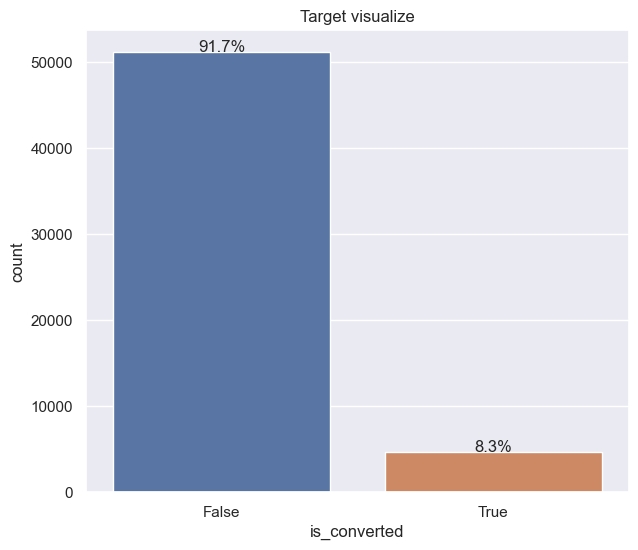

In [228]:
# target
def write_percent(ax, total_size):
    '''ÎèÑÌòï Í∞ùÏ≤¥Î•º ÏàúÌöåÌïòÎ©∞ ÎßâÎåÄ ÏÉÅÎã®Ïóê ÌÉÄÍπÉÍ∞í ÎπÑÏú® ÌëúÏãú'''
    for patch in ax.patches:
        height = patch.get_height()     # ÎèÑÌòï ÎÜíÏù¥(Îç∞Ïù¥ÌÑ∞ Í∞úÏàò)
        width = patch.get_width()       # ÎèÑÌòï ÎÑàÎπÑ
        left_coord = patch.get_x()      # ÎèÑÌòï ÏôºÏ™Ω ÌÖåÎëêÎ¶¨Ïùò xÏ∂ï ÏúÑÏπò
        percent = height/total_size*100 # ÌÉÄÍπÉÍ∞í ÎπÑÏú®
        
        # (x, y) Ï¢åÌëúÏóê ÌÖçÏä§Ìä∏ ÏûÖÎ†• 
        ax.text(x=left_coord + width/2.0,    # xÏ∂ï ÏúÑÏπò
                y=height + total_size*0.001, # yÏ∂ï ÏúÑÏπò
                s=f'{percent:1.1f}%',        # ÏûÖÎ†• ÌÖçÏä§Ìä∏
                ha='center')                 # Í∞ÄÏö¥Îç∞ Ï†ïÎ†¨
def hist_category_single(figsize,coordinate,data):
    sns.set(rc={'figure.figsize': figsize})

    ax=sns.countplot(x=coordinate,data=data)
    write_percent(ax,len(data))
    ax.set_title('Target visualize')

hist_category_single((7,6),data_visual['is_converted'].index,data_visual['is_converted'])

Îç∞Ïù¥ÌÑ∞ Î∂àÌèâÎì±
False:True = 9.1:8.3 (ÏïΩ) 

In [131]:
data_visual[colsByType['categorical']].nunique()

customer_country      15399
business_unit             5
enterprise                2
inquiry_type             71
customer_country.1    15399
customer_position       117
response_corporate       53
dtype: int64

ÎÑàÎ¨¥ ÎßéÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ¶¨ ÌïÑÏöî


In [46]:
data_visual['customer_country.1'].value_counts()

//India                                                                                                                            2956
/S√£o Paulo/Brazil                                                                                                                  1200
//United Kingdom                                                                                                                    800
//Philippines                                                                                                                       661
//                                                                                                                                  649
//United States                                                                                                                     634
/Mumbai/India                                                                                                                       588
//Brazil                                       

In [50]:
(data_visual['customer_country']!=data_visual['customer_country.1']).sum()

974

In [86]:
x=data_visual['customer_country'].apply(lambda x:x.lower().replace(' ','') if type(x)==type('') else np.nan)
x=x.apply(lambda x:x.split('/')[-1] if type(x)==type('') else np.nan)
x.value_counts()

india                                                                               16623
brazil                                                                               8237
unitedstates                                                                         3088
mexico                                                                               2515
philippines                                                                          2467
                                                                                     1944
colombia                                                                             1922
u.a.e                                                                                1508
unitedkingdom                                                                        1501
chile                                                                                1146
saudiarabia                                                                          1140
peru      

In [115]:
data_visual['inquiry_type'].value_counts()

Quotation or purchase consultation                                                                                     22908
Quotation or Purchase Consultation                                                                                     17228
Sales Inquiry                                                                                                           8844
Product Information                                                                                                     1100
Other                                                                                                                    901
Usage or technical consultation                                                                                          654
Technical Consultation                                                                                                   413
Trainings                                                                                                                376


In [117]:
x=data_visual['inquiry_type'].apply(lambda x:x.lower().replace('_',' ') if type(x)==type('') else np.nan)
x.value_counts()

quotation or purchase consultation                                                                                     40233
sales inquiry                                                                                                           8848
usage or technical consultation                                                                                         1118
product information                                                                                                     1100
other                                                                                                                    922
technical consultation                                                                                                   417
trainings                                                                                                                376
services                                                                                                                 361


In [229]:
# Î¨∂Ïùå
# [quotation, purchase ] -> QP
# technical -> TC
# information -> IF
# partnership -> PS
# demo -> DM
# trainings ->TS
# services -> SV
# sales -> SA
# distributorship ->DS
# others -> OT

def preprocess_inquiry_type(x):
    permitted={'quotation':'QP','purchase':'QP','technical':'TC','information':'IF','partnership':'PS','demo':'DM','trainings':'TS','services':'SV','sales':'SA','distributorship':'DS'}

    if type(x)==type(''):
        x=x.lower().replace('_',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

data_visual['inquiry_type']=data_visual['inquiry_type'].apply(lambda x:preprocess_inquiry_type(x))
data_visual['inquiry_type'].value_counts()

QP    40468
SA     8948
TC     1690
OT     1432
IF     1100
TS      376
SV      361
PS      273
DM      174
DS       67
Name: inquiry_type, dtype: int64

In [138]:
data_visual['customer_position'].value_counts()

none                                                                                      17667
manager                                                                                    7905
ceo/founder                                                                                7745
other                                                                                      6115
director                                                                                   4735
associate/analyst                                                                          2507
partner                                                                                    2478
entry level                                                                                2123
others                                                                                      875
trainee                                                                                     820
c-level executive                       

In [230]:
# none -> NO
# manager -> MA
# founder -> FD
# director -> DR
# entry -> EN
# analyst -> AN
# partner -> PA
# c -> CL
# trainee -> TE
# intern  -> IN
# president, government -> GV
# user -> US
# other -> OT

def preprocess_customer_position(x):
    permitted={'none':'NO','manager':'MA','founder':'FD','director':'DR','entry':'EN','analyst':'AN','partner':'PA','c':'CL','trainee':'TE','intern':'IN','president':'GV','goverment':'GV','user':'US'}

    if type(x)==type(''):
        x=x.lower().replace('-',' ').replace('/',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

data_visual['customer_position']=data_visual['customer_position'].apply(lambda x:preprocess_customer_position(x))
data_visual['customer_position'].value_counts()


NO    17667
MA     7905
FD     7748
OT     7633
DR     4738
AN     2507
PA     2479
EN     2123
CL      821
TE      820
GV      493
US      428
IN      418
Name: customer_position, dtype: int64

In [153]:
t=data_visual['response_corporate'].value_counts().index.tolist()
t.sort()
t


['LGEAF',
 'LGEAG',
 'LGEAP',
 'LGEAR',
 'LGEAS',
 'LGEBN',
 'LGEBT',
 'LGECB',
 'LGECH',
 'LGECI',
 'LGECL',
 'LGECZ',
 'LGEDG',
 'LGEEB',
 'LGEEF',
 'LGEEG',
 'LGEES',
 'LGEFS',
 'LGEGF',
 'LGEHK',
 'LGEHS',
 'LGEIL',
 'LGEIN',
 'LGEIR',
 'LGEIS',
 'LGEJP',
 'LGEKR',
 'LGELA',
 'LGELF',
 'LGEMC',
 'LGEMK',
 'LGEML',
 'LGEMS',
 'LGEPH',
 'LGEPL',
 'LGEPR',
 'LGEPS',
 'LGEPT',
 'LGERA',
 'LGERO',
 'LGESA',
 'LGESJ',
 'LGESL',
 'LGESP',
 'LGESW',
 'LGETH',
 'LGETK',
 'LGETT',
 'LGEUK',
 'LGEUR',
 'LGEUS',
 'LGEVH',
 'LGEYK']

In [231]:
# ÏûêÏÇ¨Î≤ïÏù∏Î™Ö 2020 Í∏∞Ï§ÄÏúºÎ°ú cf overseas Ï∞∏Ï°∞
# EUROPE -> LGEAG, LGECZ, LGEFS, LGEDG, LGEHS, LGEMK, LGEIS, LGESC, LGEEH, LGEBN, LGEWR, LGEPL, LGEMA, LGEPT, LGERO, LGEES, LGENO, LGESW, LGEUK -> EU
# RUSSIA$CIS -> LGEAK, LGERM, LGERI, LGERA, LGEUR, LGELV -> RC
# MIDDLE EAST & AFRICA -> 	LGEAS, LGEEG, LGELF, LGESK, LGEMC, LGESA, LGETU, LGEOT, LGEDF, LGEGF, LGEME, LGEAF, LEAO, LGENI, LGETK, LGEAT -> MA
# ASIA & PACIFIC -> LGEAP, LGEQA, LGETL, LGECH, LGEYT, LGETR, LGETA, LGESY, LGESH, LGEQH, LGEQD, LGEPN, LGENE, LGEKS, LGEHZ, LGEHN, LGEHK -> AP
# NORTH AMERICA -> LGECI, LGERS, LGEMX, LGEMS, LGEMM, LGEMR, LGEUS, LGEMU, LGEAI -> NA
# LATIN AMERICA ->LGEAG, LGEBR, LGECL, LGEVZ, LGECB, LGEPS, LGEPR -> LA

# add
# LGEIL -> Ïù∏ÎèÑ Îâ¥Îç∏Î¶¨ -> AP
# LGESP -> Î∏åÎùºÏßà ÏÉÅÌååÏö∏Î°ú -> LA
# LGEPH -> ÌïÑÎ¶¨ÌïÄ -> AP
# LGESJ -> ÏÇ¨Ïö∞ÎîîÏïÑÎùºÎπÑÏïÑ Ï†úÎã§ -> MA
# LGEVH -> Î≤†Ìä∏ÎÇ® ÌïòÏù¥ÌêÅ -> AP
# LGEAR -> ÏïÑÎ•¥Ìó®Ìã∞ÎÇò Î∂ÄÏóêÎÖ∏Ïä§ÏïÑÏù¥Î†àÏä§ -> LA
# LGEKR -> ÌïúÍµ≠ -> AP
# LGESL -> Ïã±Í∞ÄÌè¨Î•¥ Ïã±Í∞ÄÌè¨Î•¥ -> AP
# LGEIN -> Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÏûêÏπ¥Î•¥ÌÉÄ -> AP
# LGETH -> ÌÉúÍµ≠ ÎùºÏö© -> AP
# LGEEF -> ÏºÄÎÉê -> MA
# LGEML -> ÎßêÎ†àÏù¥ÏãúÏïÑ Ïø†ÏïåÎùºÎ£∏Ìë∏Î•¥ -> AP
# LGEYK -> Ïù¥Ïä§ÎùºÏóò -> MA
# LGETT -> ÎåÄÎßå ÌÉÄÏù¥ÌéòÏù¥ -> AP
# LGEJP -> ÏùºÎ≥∏ ÎèôÍ≤Ω -> AP
# LGEEB -> Î™®Î¶Ñ -> OT
# LGELA -> Î™®Î¶Ñ -> OT
# LGEIR -> Ïù¥ÎûÄ -> MA
# LGEBT -> Î™®Î¶Ñ -> OT

def preprocess_response_corporate(x):
    permitted_inverse={'EU':['LGEAG', 'LGECZ', 'LGEFS', 'LGEDG', 'LGEHS', 'LGEMK', 'LGEIS', 'LGESC', 'LGEEH', 'LGEBN', 'LGEWR', 'LGEPL', 'LGEMA', 'LGEPT', 'LGERO', 'LGEES', 'LGENO', 'LGESW', 'LGEUK'],
                       'RC':['LGEAK', 'LGERM', 'LGERI', 'LGERA', 'LGEUR', 'LGELV'],
                       'MA':['LGEAS', 'LGEEG', 'LGELF', 'LGESK', 'LGEMC', 'LGESA', 'LGETU', 'LGEOT', 'LGEDF', 'LGEGF', 'LGEME', 'LGEAF', 'LGEAO', 'LGENI', 'LGETK', 'LGEAT', 'LGESJ', 'LGEEF', 'LGEYK', 'LGEIR'],
                       'AP':['LGEAP', 'LGEQA', 'LGETL', 'LGECH', 'LGEYT', 'LGETR', 'LGETA', 'LGESY', 'LGESH', 'LGEQH', 'LGEQD', 'LGEPN', 'LGENE', 'LGEKS', 'LGEHZ', 'LGEHN', 'LGEHK', 'LGEIL', 'LGEPH', 'LGEVH', 'LGEKR', 'LGESL', 'LGEIN', 'LGETH', 'LGEML', 'LGETT', 'LGEJP'],
                       'NA':['LGECI', 'LGERS', 'LGEMX', 'LGEMS', 'LGEMM', 'LGEMR', 'LGEUS', 'LGEMU', 'LGEAI'],
                       'LA':['LGEAG', 'LGEBR', 'LGECL', 'LGEVZ', 'LGECB', 'LGEPS', 'LGEPR', 'LGESP', 'LGEAR'],
                       'OT':['LGEEB', 'LGELA', 'LGEBT']}
    permitted={}
    for pi in permitted_inverse.keys():
        for code in permitted_inverse[pi]:
            permitted[code]=pi
    
    if type(x)==type(''):
        if permitted.get(x):
            return permitted[x]
        return x
    return np.nan

data_visual['response_corporate']=data_visual['response_corporate'].apply(lambda x:preprocess_response_corporate(x))
data_visual['response_corporate'].value_counts()

AP    21924
LA    14795
NA     7921
EU     5703
MA     5412
OT       16
RC        9
Name: response_corporate, dtype: int64

In [232]:
data_visual[colsByType['numerical']].nunique()

bant_submit             5
customer_idx        35112
lead_desc_length      909
ver_cus                 2
ver_pro                 2
lead_owner            984
dtype: int64

In [233]:
data_visual['bant_submit'].value_counts()

0.50    16499
1.00    16399
0.75    11385
0.25    10992
0.00      505
Name: bant_submit, dtype: int64

In [234]:
# 4Í∞úÏùò Ï°∞Í±¥Ïùò Ïö∞ÏÑ†ÏàúÏúÑÎ•º Î™®Î¶Ñ -> Ïñ¥ÎñªÍ≤å ÌèâÍ∞Ä Îê¨ÎäîÏßÄÎèÑ Î™®Î¶Ñ -> Ï†ÑÏ≤¥ ÏûëÏÑ± ÏàòÏ§ÄÏùÑ Îì±Í∏âÏúºÎ°ú
def preprocess_bant_submit(x):
    return str(x*4)

data_visual['bant_submit']=data_visual['bant_submit'].apply(lambda x:preprocess_bant_submit(x))
colsByType['numerical'].remove('bant_submit')
colsByType['categorical'].append('bant_submit')
data_visual['bant_submit'].value_counts()

2.0    16499
4.0    16399
3.0    11385
1.0    10992
0.0      505
Name: bant_submit, dtype: int64

In [236]:
data_visual['ver_cus'].value_counts()

0    53400
1     2380
Name: ver_cus, dtype: int64

In [237]:
data_visual['ver_pro'].value_counts()

0    52847
1     2933
Name: ver_pro, dtype: int64

In [238]:
# 0, 1Ïù∏ Ïª¨Îüº Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ìï¥ÏÑù
colsByType['numerical'].remove('ver_cus')
colsByType['numerical'].remove('ver_pro')
colsByType['categorical'].append('ver_cus')
colsByType['categorical'].append('ver_pro')
colsByType['categorical']

['customer_country',
 'business_unit',
 'enterprise',
 'inquiry_type',
 'customer_country.1',
 'customer_position',
 'response_corporate',
 'bant_submit',
 'ver_cus',
 'ver_pro']

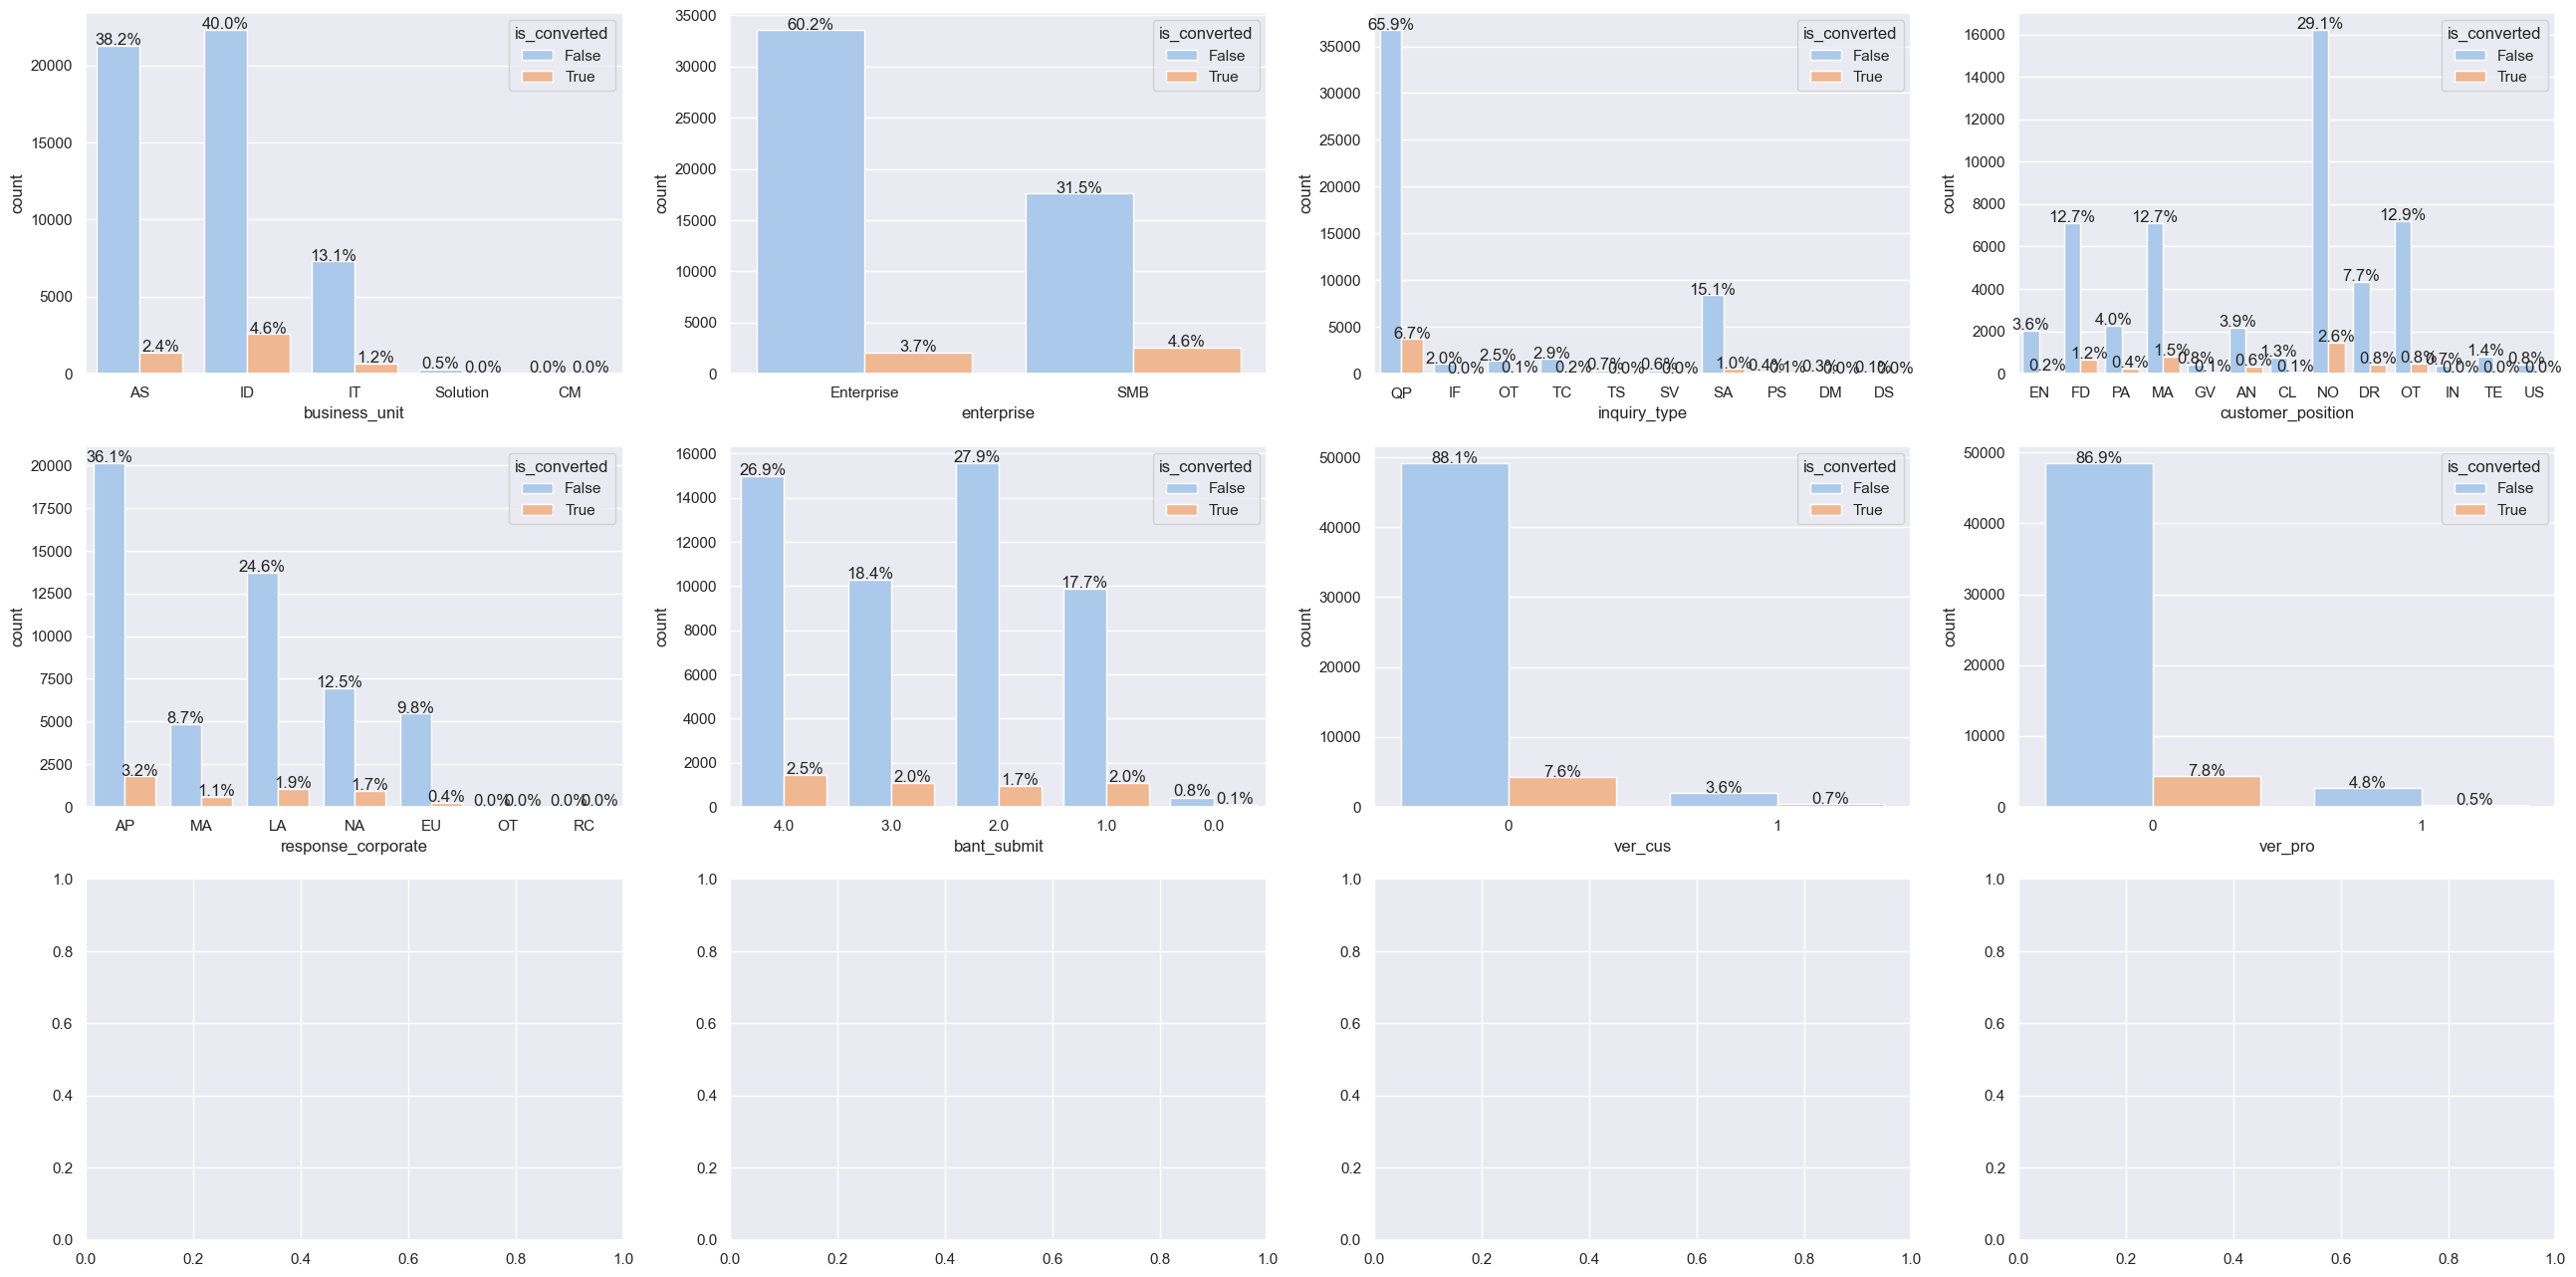

In [239]:
def hist_category_multi(figsize,plot_num,coordinate,data):
    sns.set(rc={"figure.figsize": figsize})
    plot_col=plot_num
    plot_row=int(len(coordinate)/plot_col)+1
    fig,axes=plt.subplots(plot_row,plot_col)

    for n,col in enumerate(coordinate):
        i,j=divmod(n,plot_col)
        sns.countplot(x=col,data=data,hue='is_converted',palette='pastel',ax=axes[i,j])
        write_percent(axes[i,j],len(data))

checklist=copy.deepcopy(colsByType['categorical'])

checklist.remove('customer_country')
checklist.remove('customer_country.1')

hist_category_multi((32,16),4,checklist,data_visual)
#

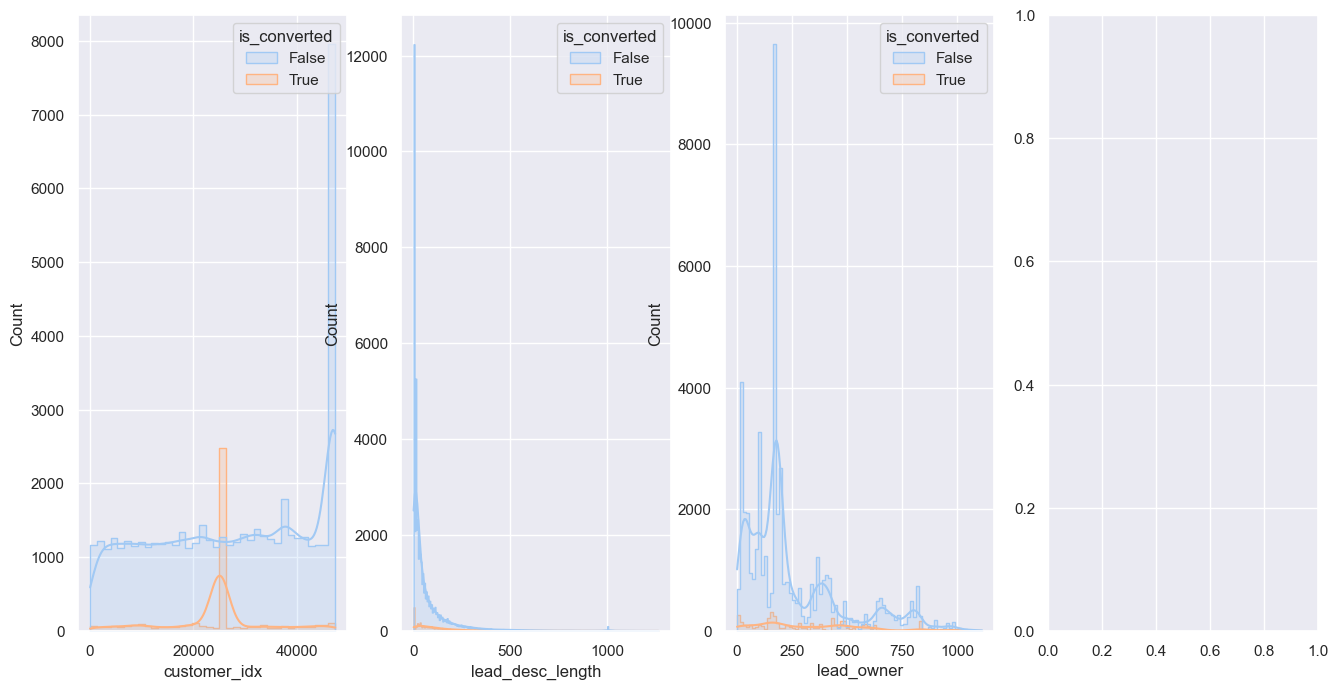

In [251]:
# Ïà´ÏûêÌòï Î∂ÑÌè¨
def hist_numerical_multi(figsize,plot_num,coordinate,data):
    sns.set(rc={"figure.figsize": figsize})
    plot_col=plot_num
    plot_row=int(len(coordinate)/plot_col)+1
    fig,axes=plt.subplots(plot_row,plot_col)

    for n,col in enumerate(coordinate):
        i,j=divmod(n,plot_col)
        sns.histplot(x=col,data=data,kde=True,ax=axes[n],element='step',hue='is_converted',hue_order=[False,True],palette='pastel')

hist_numerical_multi((16,8),4,colsByType['numerical'],data_visual)

## 3. Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨

In [427]:
# ÏãúÎìú Í≥†Ï†ï
import os

SEED=42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

In [428]:
train = pd.read_csv("train.csv") # ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞
test = pd.read_csv("submission.csv") # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ï†úÏ∂úÌååÏùºÏùò Îç∞Ïù¥ÌÑ∞)

In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [430]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [431]:
# ÌïôÏäµ ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞
targets=train['is_converted']

# ÌïúÎ≤àÏóê Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
test=test.drop('id',axis=1)
total_data=pd.concat([train,test])
total_data=total_data.drop('is_converted',axis=1)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64570 entries, 0 to 5270
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              64570 non-null  float64
 1   customer_country         63588 non-null  object 
 2   business_unit            64570 non-null  object 
 3   com_reg_ver_win_rate     16356 non-null  float64
 4   customer_idx             64570 non-null  int64  
 5   customer_type            19152 non-null  object 
 6   enterprise               64570 non-null  object 
 7   historical_existing_cnt  15031 non-null  float64
 8   id_strategic_ver         4037 non-null   float64
 9   it_strategic_ver         1174 non-null   float64
 10  idit_strategic_ver       5211 non-null   float64
 11  customer_job             44398 non-null  object 
 12  lead_desc_length         64570 non-null  int64  
 13  inquiry_type             62337 non-null  object 
 14  product_category       

### Train Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨

In [432]:
# columns
colsByType={}

colsByType['categorical']=train.columns[train.dtypes=='object'].tolist()
colsByType['numerical']=train.columns[train.dtypes!='object'].tolist()
#colsByType['numerical'].remove('is_converted')

print('\nnumerical columns: '+str(len(colsByType['numerical'])))
print('categorical columns: '+str(len(colsByType['categorical'])))
print('total columns: '+str(len(colsByType['numerical'])+len(colsByType['categorical'])))


numerical columns: 14
categorical columns: 15
total columns: 29


In [433]:
# Í≤∞Ï∏°Ïπò ÌÖåÏù¥Î∏î
nanCols=train.columns.to_list()
temp=[]
for col in nanCols:
    if col in colsByType['numerical']:
        temp.append([col,'num',train[col].isnull().sum(),''])
    else:
        temp.append([col,'cat',train[col].isnull().sum(),''])

nanData=pd.DataFrame(data=temp,columns=['Column','Type','Count','Deal'])
nanData

Column Type  Count Deal
0               bant_submit  num      0     
1          customer_country  cat    982     
2             business_unit  cat      0     
3      com_reg_ver_win_rate  num  44731     
4              customer_idx  num      0     
5             customer_type  cat  43961     
6                enterprise  cat      0     
7   historical_existing_cnt  num  45543     
8          id_strategic_ver  num  55855     
9          it_strategic_ver  num  58178     
10       idit_strategic_ver  num  54734     
11             customer_job  cat  18733     
12         lead_desc_length  num      0     
13             inquiry_type  cat    941     
14         product_category  cat  19374     
15      product_subcategory  cat  50064     
16        product_modelname  cat  50070     
17       customer_country.1  cat    982     
18        customer_position  cat      0     
19       response_corporate  cat      0     
20        expected_timeline  cat  30863     
21                  ver_cus  num      0     
22                  ver_pro  num      0     
23           ver_win_rate_x  num  40882     
24     ver_win_ratio_per_bu  num  43995     
25            business_area  cat  40882     
26         business_subarea  cat  53773     
27               lead_owner  num      0     
28             is_converted  num      0

In [434]:
# ÏÇ≠Ï†ú ÌõÑÎ≥¥Íµ∞ Í≤∞Ï∏°Ïπò 10% Ïù¥ÏÉÅ
baseLine=int(rows*0.1)

delCol=train.isnull().sum()[train.isnull().sum()>baseLine].index.tolist()
delCol

['com_reg_ver_win_rate',
 'customer_type',
 'historical_existing_cnt',
 'id_strategic_ver',
 'it_strategic_ver',
 'idit_strategic_ver',
 'customer_job',
 'product_category',
 'product_subcategory',
 'product_modelname',
 'expected_timeline',
 'ver_win_rate_x',
 'ver_win_ratio_per_bu',
 'business_area',
 'business_subarea']

In [435]:
total_data=total_data.drop(delCol,axis=1)

for dc in delCol:
    nanData.loc[nanData['Column']==dc,'Deal']='Remove'
nanData

Column Type  Count    Deal
0               bant_submit  num      0        
1          customer_country  cat    982        
2             business_unit  cat      0        
3      com_reg_ver_win_rate  num  44731  Remove
4              customer_idx  num      0        
5             customer_type  cat  43961  Remove
6                enterprise  cat      0        
7   historical_existing_cnt  num  45543  Remove
8          id_strategic_ver  num  55855  Remove
9          it_strategic_ver  num  58178  Remove
10       idit_strategic_ver  num  54734  Remove
11             customer_job  cat  18733  Remove
12         lead_desc_length  num      0        
13             inquiry_type  cat    941        
14         product_category  cat  19374  Remove
15      product_subcategory  cat  50064  Remove
16        product_modelname  cat  50070  Remove
17       customer_country.1  cat    982        
18        customer_position  cat      0        
19       response_corporate  cat      0        
20        expected_timeline  cat  30863  Remove
21                  ver_cus  num      0        
22                  ver_pro  num      0        
23           ver_win_rate_x  num  40882  Remove
24     ver_win_ratio_per_bu  num  43995  Remove
25            business_area  cat  40882  Remove
26         business_subarea  cat  53773  Remove
27               lead_owner  num      0        
28             is_converted  num      0

In [436]:
# country Îç∞Ïù¥ÌÑ∞ Ï∂îÌõÑ ÏàòÏ†ï (Ïö∞ÏÑ† Ï†úÍ±∞)
delCol=['customer_country','customer_country.1']
total_data=total_data.drop(delCol,axis=1)

for dc in delCol:
    nanData.loc[nanData['Column']==dc,'Deal']='Remove'
nanData

Column Type  Count    Deal
0               bant_submit  num      0        
1          customer_country  cat    982  Remove
2             business_unit  cat      0        
3      com_reg_ver_win_rate  num  44731  Remove
4              customer_idx  num      0        
5             customer_type  cat  43961  Remove
6                enterprise  cat      0        
7   historical_existing_cnt  num  45543  Remove
8          id_strategic_ver  num  55855  Remove
9          it_strategic_ver  num  58178  Remove
10       idit_strategic_ver  num  54734  Remove
11             customer_job  cat  18733  Remove
12         lead_desc_length  num      0        
13             inquiry_type  cat    941        
14         product_category  cat  19374  Remove
15      product_subcategory  cat  50064  Remove
16        product_modelname  cat  50070  Remove
17       customer_country.1  cat    982  Remove
18        customer_position  cat      0        
19       response_corporate  cat      0        
20        expected_timeline  cat  30863  Remove
21                  ver_cus  num      0        
22                  ver_pro  num      0        
23           ver_win_rate_x  num  40882  Remove
24     ver_win_ratio_per_bu  num  43995  Remove
25            business_area  cat  40882  Remove
26         business_subarea  cat  53773  Remove
27               lead_owner  num      0        
28             is_converted  num      0

In [437]:
# Ï†ÑÏ≤¥ Ï≤òÎ¶¨
# columns
colsByType={}

colsByType['categorical']=total_data.columns[total_data.dtypes=='object'].tolist()
colsByType['numerical']=total_data.columns[total_data.dtypes!='object'].tolist()
#colsByType['numerical'].remove('is_converted')

print('\nnumerical columns: '+str(len(colsByType['numerical'])))
print('categorical columns: '+str(len(colsByType['categorical'])))
print('total columns: '+str(len(colsByType['numerical'])+len(colsByType['categorical'])))


numerical columns: 6
categorical columns: 5
total columns: 11


In [438]:
# Î≤îÏ£ºÌòï Ï†ÑÏ≤òÎ¶¨
# Î¨∂Ïùå
# [quotation, purchase ] -> QP
# technical -> TC
# information -> IF
# partnership -> PS
# demo -> DM
# trainings ->TS
# services -> SV
# sales -> SA
# distributorship ->DS
# others -> OT

def preprocess_inquiry_type(x):
    permitted={'quotation':'QP','purchase':'QP','technical':'TC','information':'IF','partnership':'PS','demo':'DM','trainings':'TS','services':'SV','sales':'SA','distributorship':'DS'}

    if type(x)==type(''):
        x=x.lower().replace('_',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

total_data['inquiry_type']=total_data['inquiry_type'].apply(lambda x:preprocess_inquiry_type(x))
total_data['inquiry_type'].value_counts()

QP    45849
SA    10081
TC     1965
OT     1604
IF     1305
TS      455
SV      449
PS      360
DM      193
DS       76
Name: inquiry_type, dtype: int64

In [439]:
# none -> NO
# manager -> MA
# founder -> FD
# director -> DR
# entry -> EN
# analyst -> AN
# partner -> PA
# c -> CL
# trainee -> TE
# intern  -> IN
# president, government -> GV
# user -> US
# other -> OT

def preprocess_customer_position(x):
    permitted={'none':'NO','manager':'MA','founder':'FD','director':'DR','entry':'EN','analyst':'AN','partner':'PA','c':'CL','trainee':'TE','intern':'IN','president':'GV','goverment':'GV','user':'US'}

    if type(x)==type(''):
        x=x.lower().replace('-',' ').replace('/',' ')
        for word in x.split(' '):
            if permitted.get(word):
                return permitted[word]
        return 'OT'
    return np.nan

total_data['customer_position']=total_data['customer_position'].apply(lambda x:preprocess_customer_position(x))
total_data['customer_position'].value_counts()

NO    21637
MA     8943
OT     8798
FD     8581
DR     5191
AN     2876
PA     2762
EN     2441
CL      942
TE      898
GV      564
IN      506
US      431
Name: customer_position, dtype: int64

In [440]:
# ÏûêÏÇ¨Î≤ïÏù∏Î™Ö 2020 Í∏∞Ï§ÄÏúºÎ°ú cf overseas Ï∞∏Ï°∞
# EUROPE -> LGEAG, LGECZ, LGEFS, LGEDG, LGEHS, LGEMK, LGEIS, LGESC, LGEEH, LGEBN, LGEWR, LGEPL, LGEMA, LGEPT, LGERO, LGEES, LGENO, LGESW, LGEUK -> EU
# RUSSIA$CIS -> LGEAK, LGERM, LGERI, LGERA, LGEUR, LGELV -> RC
# MIDDLE EAST & AFRICA -> 	LGEAS, LGEEG, LGELF, LGESK, LGEMC, LGESA, LGETU, LGEOT, LGEDF, LGEGF, LGEME, LGEAF, LEAO, LGENI, LGETK, LGEAT -> MA
# ASIA & PACIFIC -> LGEAP, LGEQA, LGETL, LGECH, LGEYT, LGETR, LGETA, LGESY, LGESH, LGEQH, LGEQD, LGEPN, LGENE, LGEKS, LGEHZ, LGEHN, LGEHK -> AP
# NORTH AMERICA -> LGECI, LGERS, LGEMX, LGEMS, LGEMM, LGEMR, LGEUS, LGEMU, LGEAI -> NA
# LATIN AMERICA ->LGEAG, LGEBR, LGECL, LGEVZ, LGECB, LGEPS, LGEPR -> LA

# add
# LGEIL -> Ïù∏ÎèÑ Îâ¥Îç∏Î¶¨ -> AP
# LGESP -> Î∏åÎùºÏßà ÏÉÅÌååÏö∏Î°ú -> LA
# LGEPH -> ÌïÑÎ¶¨ÌïÄ -> AP
# LGESJ -> ÏÇ¨Ïö∞ÎîîÏïÑÎùºÎπÑÏïÑ Ï†úÎã§ -> MA
# LGEVH -> Î≤†Ìä∏ÎÇ® ÌïòÏù¥ÌêÅ -> AP
# LGEAR -> ÏïÑÎ•¥Ìó®Ìã∞ÎÇò Î∂ÄÏóêÎÖ∏Ïä§ÏïÑÏù¥Î†àÏä§ -> LA
# LGEKR -> ÌïúÍµ≠ -> AP
# LGESL -> Ïã±Í∞ÄÌè¨Î•¥ Ïã±Í∞ÄÌè¨Î•¥ -> AP
# LGEIN -> Ïù∏ÎèÑÎÑ§ÏãúÏïÑ ÏûêÏπ¥Î•¥ÌÉÄ -> AP
# LGETH -> ÌÉúÍµ≠ ÎùºÏö© -> AP
# LGEEF -> ÏºÄÎÉê -> MA
# LGEML -> ÎßêÎ†àÏù¥ÏãúÏïÑ Ïø†ÏïåÎùºÎ£∏Ìë∏Î•¥ -> AP
# LGEYK -> Ïù¥Ïä§ÎùºÏóò -> MA
# LGETT -> ÎåÄÎßå ÌÉÄÏù¥ÌéòÏù¥ -> AP
# LGEJP -> ÏùºÎ≥∏ ÎèôÍ≤Ω -> AP
# LGEEB -> Î™®Î¶Ñ -> OT
# LGELA -> Î™®Î¶Ñ -> OT
# LGEIR -> Ïù¥ÎûÄ -> MA
# LGEBT -> Î™®Î¶Ñ -> OT

def preprocess_response_corporate(x):
    permitted_inverse={'EU':['LGEAG', 'LGECZ', 'LGEFS', 'LGEDG', 'LGEHS', 'LGEMK', 'LGEIS', 'LGESC', 'LGEEH', 'LGEBN', 'LGEWR', 'LGEPL', 'LGEMA', 'LGEPT', 'LGERO', 'LGEES', 'LGENO', 'LGESW', 'LGEUK'],
                       'RC':['LGEAK', 'LGERM', 'LGERI', 'LGERA', 'LGEUR', 'LGELV'],
                       'MA':['LGEAS', 'LGEEG', 'LGELF', 'LGESK', 'LGEMC', 'LGESA', 'LGETU', 'LGEOT', 'LGEDF', 'LGEGF', 'LGEME', 'LGEAF', 'LGEAO', 'LGENI', 'LGETK', 'LGEAT', 'LGESJ', 'LGEEF', 'LGEYK', 'LGEIR'],
                       'AP':['LGEAP', 'LGEQA', 'LGETL', 'LGECH', 'LGEYT', 'LGETR', 'LGETA', 'LGESY', 'LGESH', 'LGEQH', 'LGEQD', 'LGEPN', 'LGENE', 'LGEKS', 'LGEHZ', 'LGEHN', 'LGEHK', 'LGEIL', 'LGEPH', 'LGEVH', 'LGEKR', 'LGESL', 'LGEIN', 'LGETH', 'LGEML', 'LGETT', 'LGEJP'],
                       'NA':['LGECI', 'LGERS', 'LGEMX', 'LGEMS', 'LGEMM', 'LGEMR', 'LGEUS', 'LGEMU', 'LGEAI'],
                       'LA':['LGEAG', 'LGEBR', 'LGECL', 'LGEVZ', 'LGECB', 'LGEPS', 'LGEPR', 'LGESP', 'LGEAR'],
                       'OT':['LGEEB', 'LGELA', 'LGEBT']}
    permitted={}
    for pi in permitted_inverse.keys():
        for code in permitted_inverse[pi]:
            permitted[code]=pi
    
    if type(x)==type(''):
        if permitted.get(x):
            return permitted[x]
        return x
    return np.nan

total_data['response_corporate']=total_data['response_corporate'].apply(lambda x:preprocess_response_corporate(x))
total_data['response_corporate'].value_counts()

AP    23999
LA    17264
NA    10193
EU     6646
MA     6443
OT       16
RC        9
Name: response_corporate, dtype: int64

In [441]:
# 4Í∞úÏùò Ï°∞Í±¥Ïùò Ïö∞ÏÑ†ÏàúÏúÑÎ•º Î™®Î¶Ñ -> Ïñ¥ÎñªÍ≤å ÌèâÍ∞Ä Îê¨ÎäîÏßÄÎèÑ Î™®Î¶Ñ -> Ï†ÑÏ≤¥ ÏûëÏÑ± ÏàòÏ§ÄÏùÑ Îì±Í∏âÏúºÎ°ú
def preprocess_bant_submit(x):
    return str(x*4)

total_data['bant_submit']=total_data['bant_submit'].apply(lambda x:preprocess_bant_submit(x))
colsByType['numerical'].remove('bant_submit')
colsByType['categorical'].append('bant_submit')
total_data['bant_submit'].value_counts()

4.0    19131
2.0    17859
1.0    14374
3.0    12226
0.0      980
Name: bant_submit, dtype: int64

In [442]:
# 0, 1Ïù∏ Ïª¨Îüº Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ìï¥ÏÑù
colsByType['numerical'].remove('ver_cus')
colsByType['numerical'].remove('ver_pro')
colsByType['categorical'].append('ver_cus')
colsByType['categorical'].append('ver_pro')
colsByType['categorical']

['business_unit',
 'enterprise',
 'inquiry_type',
 'customer_position',
 'response_corporate',
 'bant_submit',
 'ver_cus',
 'ver_pro']

In [443]:
# enterprise 0,1Î°ú Î≥ÄÌôò
total_data['enterprise']=total_data['enterprise'].replace('Enterprise',1)
total_data['enterprise']=total_data['enterprise'].replace('SMB',0)
total_data['enterprise'].info()

<class 'pandas.core.series.Series'>
Int64Index: 64570 entries, 0 to 5270
Series name: enterprise
Non-Null Count  Dtype
--------------  -----
64570 non-null  int64
dtypes: int64(1)
memory usage: 1008.9 KB


In [444]:
contents=[]
for col in colsByType['numerical']:
    contents.append([col,total_data[col].skew()])

table=pd.DataFrame(data=contents,columns=['Column','SKEW'])
table

Column      SKEW
0      customer_idx -0.122879
1  lead_desc_length  3.593431
2        lead_owner  1.248199

In [445]:
# log Ïä§ÏºÄÏùº
for col in colsByType['numerical']:
    total_data[col]=np.log1p(total_data[col])

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌïòÎÇòÏî©

In [446]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64570 entries, 0 to 5270
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         64570 non-null  object 
 1   business_unit       64570 non-null  object 
 2   customer_idx        64570 non-null  float64
 3   enterprise          64570 non-null  int64  
 4   lead_desc_length    64570 non-null  float64
 5   inquiry_type        62337 non-null  object 
 6   customer_position   64570 non-null  object 
 7   response_corporate  64570 non-null  object 
 8   ver_cus             64570 non-null  int64  
 9   ver_pro             64570 non-null  int64  
 10  lead_owner          64570 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 5.9+ MB


In [447]:
# Î≤îÏ£ºÌòïÏùÄ ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
mode_cols=[]
def replace_mode(cols,table,data):
    for col in cols:
        data[col]=data[col].fillna(data[col].mode()[0])
        table.loc[table['Column']==col,'Deal']='Mode'

replace_mode(colsByType['categorical'],nanData,total_data)
nanData

Column Type  Count    Deal
0               bant_submit  num      0    Mode
1          customer_country  cat    982  Remove
2             business_unit  cat      0    Mode
3      com_reg_ver_win_rate  num  44731  Remove
4              customer_idx  num      0        
5             customer_type  cat  43961  Remove
6                enterprise  cat      0    Mode
7   historical_existing_cnt  num  45543  Remove
8          id_strategic_ver  num  55855  Remove
9          it_strategic_ver  num  58178  Remove
10       idit_strategic_ver  num  54734  Remove
11             customer_job  cat  18733  Remove
12         lead_desc_length  num      0        
13             inquiry_type  cat    941    Mode
14         product_category  cat  19374  Remove
15      product_subcategory  cat  50064  Remove
16        product_modelname  cat  50070  Remove
17       customer_country.1  cat    982  Remove
18        customer_position  cat      0    Mode
19       response_corporate  cat      0    Mode
20        expected_timeline  cat  30863  Remove
21                  ver_cus  num      0    Mode
22                  ver_pro  num      0    Mode
23           ver_win_rate_x  num  40882  Remove
24     ver_win_ratio_per_bu  num  43995  Remove
25            business_area  cat  40882  Remove
26         business_subarea  cat  53773  Remove
27               lead_owner  num      0        
28             is_converted  num      0

In [448]:
# Ïà´ÏûêÌòï Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥ KNN,MICE ÏÇ¨Ïö©
#from fancyimpute import KNN
from fancyimpute import IterativeImputer

imputer=IterativeImputer()
objectData=total_data.drop(colsByType['numerical'],axis=1)
mice=total_data.drop(colsByType['categorical'],axis=1)
mice.iloc[:,:]=imputer.fit_transform(mice)
data=pd.concat([objectData,mice],axis=1)
nanData.loc[(nanData['Type']=='num')&(nanData['Deal']==''),'Deal']='MICE'
nanData


Column Type  Count    Deal
0               bant_submit  num      0    Mode
1          customer_country  cat    982  Remove
2             business_unit  cat      0    Mode
3      com_reg_ver_win_rate  num  44731  Remove
4              customer_idx  num      0    MICE
5             customer_type  cat  43961  Remove
6                enterprise  cat      0    Mode
7   historical_existing_cnt  num  45543  Remove
8          id_strategic_ver  num  55855  Remove
9          it_strategic_ver  num  58178  Remove
10       idit_strategic_ver  num  54734  Remove
11             customer_job  cat  18733  Remove
12         lead_desc_length  num      0    MICE
13             inquiry_type  cat    941    Mode
14         product_category  cat  19374  Remove
15      product_subcategory  cat  50064  Remove
16        product_modelname  cat  50070  Remove
17       customer_country.1  cat    982  Remove
18        customer_position  cat      0    Mode
19       response_corporate  cat      0    Mode
20        expected_timeline  cat  30863  Remove
21                  ver_cus  num      0    Mode
22                  ver_pro  num      0    Mode
23           ver_win_rate_x  num  40882  Remove
24     ver_win_ratio_per_bu  num  43995  Remove
25            business_area  cat  40882  Remove
26         business_subarea  cat  53773  Remove
27               lead_owner  num      0    MICE
28             is_converted  num      0    MICE

In [449]:
total_data.columns

Index(['bant_submit', 'business_unit', 'customer_idx', 'enterprise',
       'lead_desc_length', 'inquiry_type', 'customer_position',
       'response_corporate', 'ver_cus', 'ver_pro', 'lead_owner'],
      dtype='object')

In [456]:
dummyData=pd.get_dummies(total_data)
dummyData.shape

(64570, 46)

In [457]:
targets=targets.apply(lambda x:1 if x else 0)
targets.info()

<class 'pandas.core.series.Series'>
RangeIndex: 59299 entries, 0 to 59298
Series name: is_converted
Non-Null Count  Dtype
--------------  -----
59299 non-null  int64
dtypes: int64(1)
memory usage: 463.4 KB


In [458]:
trainDummy=dummyData[:59299]
testDummy=dummyData[59299:]
print(trainDummy.shape)
print(testDummy.shape)
print(targets.shape)
print(trainDummy.isnull().sum()[trainDummy.isnull().sum()>0])
print(testDummy.isnull().sum()[testDummy.isnull().sum()>0])

(59299, 46)
(5271, 46)
(59299,)
Series([], dtype: int64)
Series([], dtype: int64)


In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier


In [464]:
models=[
    LogisticRegression(random_state=SEED),
    SVC(random_state=SEED),
    DecisionTreeClassifier(random_state=SEED),
    GradientBoostingClassifier(n_estimators=1000,learning_rate=0.05,random_state=SEED),
    RandomForestClassifier(n_estimators=1000,random_state=SEED),
    LGBMClassifier(n_estimators=1000,learning_rate=0.05,random_state=SEED),
    XGBClassifier(learning_rate=0.05,random_state=SEED,objective='binary:logistic',eval_metric='logloss'),
    CatBoostClassifier(random_seed=SEED),
    StackingClassifier(classifiers=(LogisticRegression(random_state=SEED),
                                    RandomForestClassifier(random_state=SEED),
                                    CatBoostClassifier(random_seed=SEED)),
                                    meta_classifier=CatBoostClassifier(random_seed=SEED))
]
model_names=[
    'LogisticRegression',
    'SVC',
    'DecisionTreeClassifier',
    'GradientBoostingClassifier',
    'RandomForestClassifier',
    'LGBMClassifier',
    'XGBClassifier',
    'CatBoostClassifier',
    'StackingClassifier'
]

In [465]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ -> target Í∞íÏù¥ Ìé∏Ìñ•ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Í∞Å ÎùºÎ≤®Î≥ÑÎ°ú Í∑†Îì±ÌïòÍ≤å Îì§Ïñ¥Í∞ÄÍ≤å Ï°∞Ï†ïÌï¥ÏÑú ÎÑ£Ïñ¥Î¥Ñ
train_X,val_X,train_y,val_y=train_test_split(trainDummy,targets,test_size=0.2,shuffle=True,stratify=targets,random_state=SEED)

In [466]:
# Î™®Îç∏ ÏÑ±Îä• ÌÖåÏä§Ìä∏
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("Ïò§Ï∞®ÌñâÎ†¨:\n", confusion)
    print("\nÏ†ïÌôïÎèÑ: {:.4f}".format(accuracy))
    print("Ï†ïÎ∞ÄÎèÑ: {:.4f}".format(precision))
    print("Ïû¨ÌòÑÏú®: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))
    return F1

In [467]:
# test code
best_model=None
best_score=-1
best_model_name=None
for i,model in enumerate(models):
    print(model_names[i]+' start\n')
    model.fit(train_X,train_y)
    pred=model.predict(val_X)
    score=get_clf_eval(val_y,pred)
    if score>best_score:
        best_score=score
        best_model=model
        best_model_name=model_names[i]



LogisticRegression start

Ïò§Ï∞®ÌñâÎ†¨:
 [[    8   962]
 [    9 10881]]

Ï†ïÌôïÎèÑ: 0.9181
Ï†ïÎ∞ÄÎèÑ: 0.4706
Ïû¨ÌòÑÏú®: 0.0082
F1: 0.0162
SVC start

Ïò§Ï∞®ÌñâÎ†¨:
 [[    0   970]
 [    0 10890]]

Ï†ïÌôïÎèÑ: 0.9182
Ï†ïÎ∞ÄÎèÑ: 0.0000
Ïû¨ÌòÑÏú®: 0.0000
F1: 0.0000
DecisionTreeClassifier start

Ïò§Ï∞®ÌñâÎ†¨:
 [[  752   218]
 [  236 10654]]

Ï†ïÌôïÎèÑ: 0.9617
Ï†ïÎ∞ÄÎèÑ: 0.7611
Ïû¨ÌòÑÏú®: 0.7753
F1: 0.7681
GradientBoostingClassifier start

Ïò§Ï∞®ÌñâÎ†¨:
 [[  638   332]
 [   40 10850]]

Ï†ïÌôïÎèÑ: 0.9686
Ï†ïÎ∞ÄÎèÑ: 0.9410
Ïû¨ÌòÑÏú®: 0.6577
F1: 0.7743
RandomForestClassifier start

Ïò§Ï∞®ÌñâÎ†¨:
 [[  686   284]
 [   32 10858]]

Ï†ïÌôïÎèÑ: 0.9734
Ï†ïÎ∞ÄÎèÑ: 0.9554
Ïû¨ÌòÑÏú®: 0.7072
F1: 0.8128
LGBMClassifier start

[LightGBM] [Info] Number of positive: 3880, number of negative: 43559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

In [468]:
best_model_name

'RandomForestClassifier'

In [469]:
test_X=testDummy
test_pred=best_model.predict(test_X)
submission=pd.read_csv('submission.csv')
submission['is_converted']=test_pred

submission.to_csv('submission.csv',index=False)
submission.head()

id  bant_submit                                   customer_country  \
0  19844         0.00                                        /  / Brazil   
1   9738         0.25  400 N State Of Franklin Rd  Cloud IT / Johnson...   
2   8491         1.00                                         /  / U.A.E   
3  19895         0.50                         / Madison  / United States   
4  10465         1.00                               / Sao Paulo / Brazil   

  business_unit  com_reg_ver_win_rate  customer_idx          customer_type  \
0            ID              0.073248         47466           End Customer   
1            IT                   NaN          5405           End Customer   
2            ID                   NaN         13597  Specifier/ Influencer   
3            ID              0.118644         17204                    NaN   
4            ID              0.074949          2329           End Customer   

   enterprise  historical_existing_cnt  id_strategic_ver  ...  \
0  Enterprise                     53.0               NaN  ...   
1         SMB                      NaN               NaN  ...   
2         SMB                      NaN               NaN  ...   
3  Enterprise                      NaN               NaN  ...   
4  Enterprise                      2.0               1.0  ...   

   response_corporate   expected_timeline ver_cus  ver_pro ver_win_rate_x  \
0               LGESP                 NaN       1        0       0.001183   
1               LGEUS                 NaN       0        0       0.000013   
2               LGEGF  less than 3 months       0        0       0.000060   
3               LGEUS    more than a year       0        0       0.001183   
4               LGESP  less than 3 months       1        1       0.003079   

  ver_win_ratio_per_bu           business_area     business_subarea  \
0             0.049840                  retail  Electronics & Telco   
1                  NaN          transportation               Others   
2             0.131148  hospital & health care     General Hospital   
3             0.049840                  retail                  NaN   
4             0.064566      corporate / office          Engineering   

  lead_owner is_converted  
0        278            0  
1        437            1  
2        874            0  
3        194            0  
4        167            0  

[5 rows x 30 columns]